# Make the parallel coordinate plots and find the best model configuration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn

In [3]:
dw = pd.read_csv("tunedW.csv")
du = pd.read_csv("tunedU.csv")

In [4]:
nan = dw['max_depth'][7] 
dfw = dw.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])
dfu = du.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])


/var/folders/dd/vs2td51d7b366p_g2_844p100000gq/T/ipykernel_17172/1885693186.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfw = dw.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])
/var/folders/dd/vs2td51d7b366p_g2_844p100000gq/T/ipykernel_17172/1885693186.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfu = du.replace(to_replace=['gini','entropy','log_loss',nan],value=[50,100,150,150])


In [44]:
def parallel_coordinates(frame, class_column, case, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None, savefig=False,
                     **kwds):

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)
    fontsize = 13

    if case =='U':
        name = 'Upsampled Data'
    if case == 'W':
        name = 'Cost-sensitive Learning'

    df = frame.drop(class_column, axis=1)

    # used_legends = set([])

    ncols = len(df.columns)
    x = range(ncols)

    fig = plt.figure()
    ax = plt.gca()

    cmap = mpl.cm.viridis_r # viridis, magma
    bounds = np.linspace(0.02,0.09,29)
    norm = mpl.colors.BoundaryNorm(bounds,cmap.N, extend='both')
    scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        color = scalar_map.to_rgba(class_col[i])
        ax.plot(x, y, color=color, alpha=0.3, **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black',alpha=1)

    # hard code the labels on the n_estimators axis
    ax.set_yticks([1,30,60,100,200])
    ax.set_yticklabels(['1','30','60','100','200'], fontsize=fontsize)

    # hard code the max_depth axis
    ax.set_ylim(0, 200)
    ax.text(1,148,'- None', fontsize=fontsize)
    ax.text(1,12,'- 12', fontsize=fontsize)
    ax.text(1,50,'- 50', fontsize=fontsize)
        
    # hardcode the criterion axis 
    ax1 = ax.twinx()
    ax1.set_yticks([0.25,0.5,0.75])
    ax1.set_yticklabels(['gini','entropy','log_loss'], fontsize=fontsize)

    ax.text(-0.25,208,'n_estimators', fontsize=fontsize)
    ax.text(0.8,208,'max_depth', fontsize=fontsize)
    ax.text(1.8,208,'criterion', fontsize=fontsize)
    ax.set_xlim(x[0], x[-1])
    ax.set_title(f'Hyperparameters\n{name}',pad=33,fontsize=15)

    # get rid of top and bottom axis
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-ticks
    seaborn.despine(top=True,bottom=True,left=False,right=False)

    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                        ax=ax,
                        orientation='vertical', label='skill (log-loss)', pad=0.20
                        )
    cbar.ax.invert_yaxis()
    cbar.set_ticks([0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09])
    cbar.set_ticklabels(['0.02','0.03','0.04','0.05','0.06','0.07','0.08','0.09'])

    if savefig:
        plt.savefig(f'./figures/Hyper{case}.png', bbox_inches='tight')

    return 

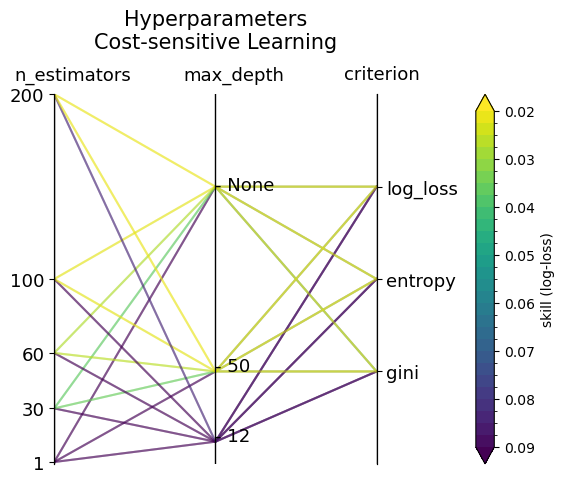

In [45]:
df = dfw[['n_estimators','max_depth','criterion','LL_RF_w']]
parallel_coordinates(df, 'LL_RF_w',case='W',savefig=True)


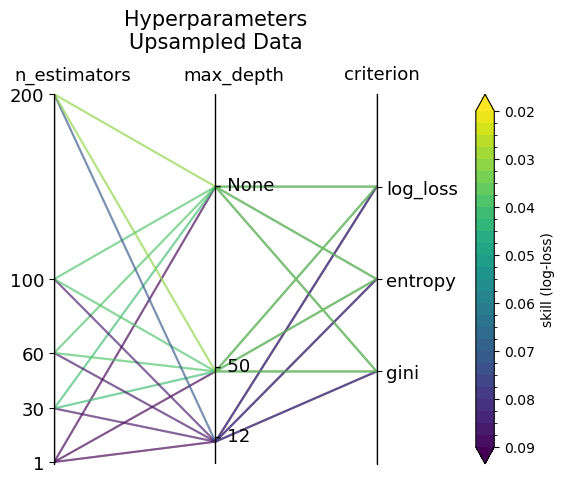

In [46]:
df = dfu[['n_estimators','max_depth','criterion','LL_RF_up']]
parallel_coordinates(df, 'LL_RF_up',case='U',savefig=True)